# House Pricing Competition

**with Neural Network and Random Forest**

Importamos las libreías de tensorflow y keras para nuestro modelo de redes neuronales profundas. Y comprobamos la versión.

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
from tensorflow import keras
keras.__version__

'2.6.0'

Añadimos nuevas librerías

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Los archivos de datos están disponibles en el directorio "../input/" 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Hay cuatro archivos que existen en este fichero: (1) train.csv, (2) test.csv, (3) sample_submission.csv y (4) data_description.txt

Vamos a mirar cuáles son las características de nuestros datos :

- MSSubClass: Identifica el tipo de vivienda involucrada en la venta.

- MSZoning: Identifica la clasificación de zonificación general de la venta.

- LoteFrontage: Pies lineales de calle conectados a la propiedad

- LotArea: Tamaño del lote en pies cuadrados

- Calle: Tipo de vía de acceso a la propiedad
       
- Callejón: Tipo de callejón de acceso a la propiedad.

- LotShape: Forma general de la propiedad
       
- LandContour: Planitud de la propiedad

- Utilidades: tipo de utilidades disponibles

- LotConfig: configuración del lote

- LandSlope: Pendiente de la propiedad

- Vecindario: ubicaciones físicas dentro de los límites de la ciudad de Ames

- Condición 1: proximidad a diversas condiciones

- Condición 2: proximidad a varias condiciones (si hay más de una)

- BldgType: Tipo de vivienda

- HouseStyle: estilo de vivienda

- OverallQual: Califica el material general y el acabado de la casa.

- OverallCond: Valora el estado general de la casa.

- Año de construcción: fecha de construcción original

- YearRemodAdd: fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones o adiciones)

- RoofStyle: Tipo de techo

- RoofMatl: material del techo

- Exterior1st: Revestimiento exterior de la casa

- Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)

- MasVnrType: tipo de chapa 

- MasVnrArea: Área de revestimiento de mampostería en pies cuadrados

- ExterQual: Evalúa la calidad del material en el exterior

- ExterCond: Evalúa el estado actual del material en el exterior.

- Fundación: Tipo de fundación

- BsmtQual: Evalúa la altura del sótano

- BsmtCond: Evalúa el estado general del sótano

- BsmtExposure: se refiere a muros a nivel de jardín o de huelga

- BsmtFinType1: Calificación del área terminada del sótano

- BsmtFinSF1: pies cuadrados terminados tipo 1

- BsmtFinType2: Calificación del área terminada del sótano (si hay varios tipos)

- BsmtFinSF2: pies cuadrados con acabado tipo 2

- BsmtUnfSF: pies cuadrados sin terminar de área del sótano

- TotalBsmtSF: Total de pies cuadrados de área del sótano

- Calefacción: Tipo de calefacción

- Calefacción QC: calidad y estado de la calefacción

- CentralAir: aire acondicionado central

- Eléctrico: sistema eléctrico

- 1stFlrSF: pies cuadrados del primer piso
 
- 2ndFlrSF: pies cuadrados del segundo piso

- LowQualFinSF: pies cuadrados con acabado de baja calidad (todos los pisos)

- GrLivArea: pies cuadrados de área habitable sobre el nivel (suelo)

- BsmtFullBath: Baños completos en el sótano

- BsmtHalfBath: Medios baños en el sótano

- FullBath: baños completos sobre rasante

- HalfBath: Medios baños sobre el nivel del suelo

- Dormitorio: dormitorios sobre el nivel del suelo (NO incluye dormitorios en el sótano)

- Cocina: Cocinas sobre rasante

- KitchenQual: calidad de la cocina
       
- TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)

- Funcional: funcionalidad del hogar (suponga que es típico a menos que se justifiquen las deducciones)

- Chimeneas: Número de chimeneas

- FireplaceQu: Calidad de chimenea

- GarageType: Alquiler de garaje

- GarageYrBlt: año en que se construyó el garaje

- GarageFinish: Acabado interior del garaje

- GarageCars: Tamaño del garaje en capacidad de automóvil

- GarageArea: Tamaño del garaje en pies cuadrados

- GarageQual: Calidad de garaje

- GarageCond: Estado del garaje

- PavedDrive: entrada pavimentada

- WoodDeckSF: Área de la plataforma de madera en pies cuadrados

- OpenPorchSF: Área de porche abierto en pies cuadrados

- Porche cerrado: área de porche cerrado en pies cuadrados

- 3SsnPorch: área de porche de tres estaciones en pies cuadrados

- ScreenPorch: Área del porche de la pantalla en pies cuadrados

- PoolArea: Área de la piscina en pies cuadrados

- PoolQC: Calidad de la piscina

- Valla: calidad de la valla

- MoSold: Mes vendido (MM)

- YrSold: año vendido (YYYY)

- SaleType: Tipo de venta

- SaleCondition: Condición de venta

Observamos que tenemos demasiadas características con datos muy diversos, tanto datos **númericos como características categóricas**

En esta celda cargamos el archivo train.csv.

El valor en la columna "SalePrice" determina el precio de la vivienda. Está es la caracterítica etiquetada que intentaremos predecir.

In [4]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col='Id')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Podemos ver que existen tanto características categóricas como numéricas.

Además las características numéricas están en rangos muy diversos, esto va a suponer un problema. - > Usar **estandarización**

En esta celda cargamos el archivo test.csv, contiene información de nuevas viviendas. A partir de los patrones de train.csv, se va predecir el precio de la vivienda.

In [5]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col='Id')
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Importamos las librerías necesarias para nuestro modelo que vamos a utilizar

In [6]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

El método describe() devuelve información estadística de los datos del dataframe. Miramos la información que nos devuelve la columna que funciona como etiqueta del modelo.

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Realizamos un gráfico de la proporción en los precios de las distintas viviendas

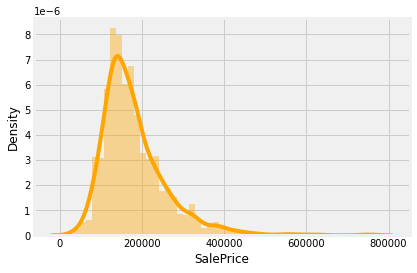

In [8]:
sns.distplot(train_data['SalePrice'], color="orange");

Vamos a mirar la correlación entre caracterísiticas con nuestro heatmap.

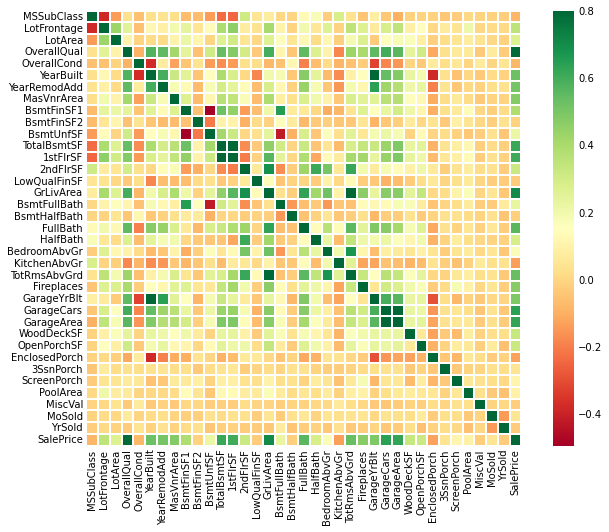

In [9]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn',linewidths=0.4);
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

- NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Si dos características están correlacionadas positivamente, indica que la información que contienen es muy similar. Esto se conoce como MultiColinearity.

A lo mejor esa información es rebundante y no necesitamos usarla. En el proceso de entrenamiento debemos intentar eliminar este tipo de información.

DECIDIMOS MANTENER ESTAS CARACTERÍSTICAS PARA NUESTRO MODELO

- SalePrice 
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF
- FullBath
- YearBuilt

Intentamos encontrar las relaciones entre las variables que mantenemos

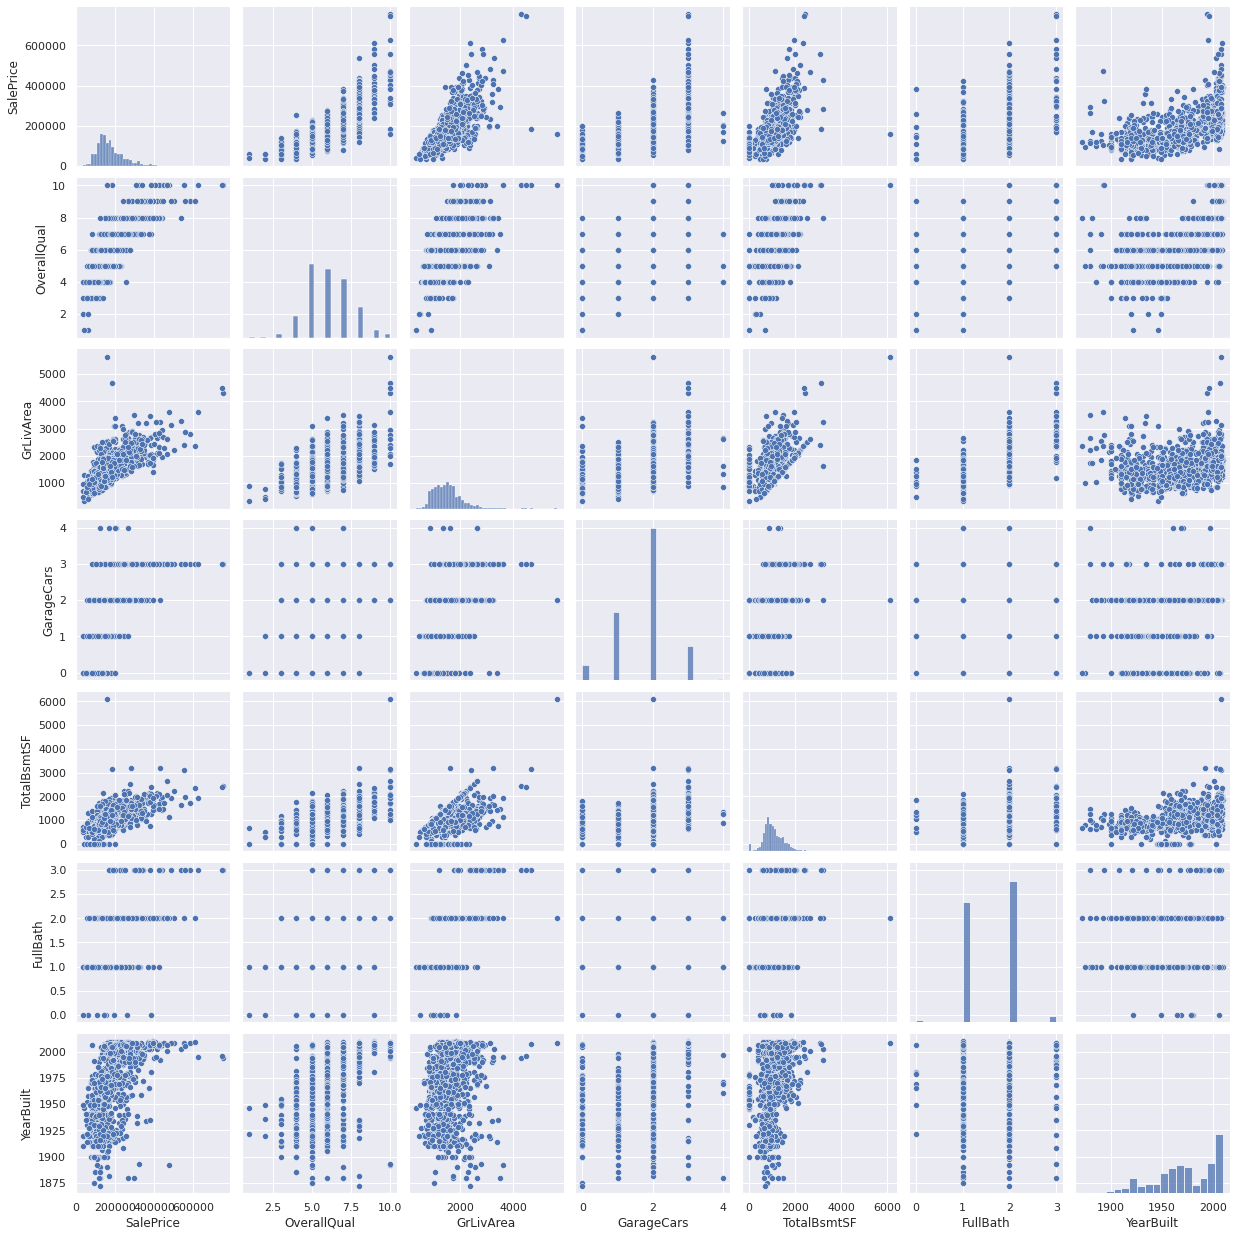

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

Vamos a comenzar a controlar el total de los valores nulos de las celdas.

In [11]:
print("Columnas nulas en conjunto de entrenamiento", train_data.isnull().sum())

Columnas nulas en conjunto de entrenamiento MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


Tenemos 80 columnas de características y 1460 instancias de datos

In [12]:
print("Tamaño del dataset de entrenamiento", train_data.shape)
train_data.shape

Tamaño del dataset de entrenamiento (1460, 80)


(1460, 80)

En el conjunto de datos de test tenemos 79 características, ya que no contamos con la etiqueta final

In [13]:
print("Tamaño del dataset de prueba", test_data.shape)
test_data.shape

Tamaño del dataset de prueba (1459, 79)


(1459, 79)

Contamos el número de valores nulos para cada columnas y el porcentaje que representan.

Creamos una tabla con los valores.

In [14]:
total = train_data.isnull().sum().sort_values(ascending=False)
porcentaje = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

#Mostramos para los primeros 25 valores
missing_data.head(25)

,Total,Porcentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Algunas de estas características son de interés para nosotros y no muestran una escasez masiva de datos, así que rellenamos  con la media de los valores de cada columna.

In [15]:
train_data = train_data.fillna(train_data.mean())

Ahora debemos eliminar los valores atípicos, por ejemplo, los datos que no coinciden con lo que esperamos.

Para hacer esto, estandarizamos los datos para que la media sea 0 y una desviación estándar de 1.

StandardScaler realiza la tarea de Estandarización para la característica de salida "SalePrice"

In [16]:
saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Rangos de la distribución bajo')
print(low_range)
print('Rangos de la distribución alto')
print(high_range)

Rangos de la distribución bajo
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
Rangos de la distribución alto
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


- Los valores similares entre sí se mantendrán cerca de 0
- Los valores que son un poco extraños obtienen valores altos como los 7 valores.

En este momento gracias al análisis de características y correlación, tenemos una idea de qué tipo de datos nos interesan.

Recargamos los datos en otra variable para que podamos comenzar de nuevo.

In [17]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

Una red neuronal es bastante buena para trabajar con datos no lineales. Probamos con un modelo de red neuronal

Creamos variables dummies. * *A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something.*

Para nuestra red necesitamos variables numéricas asi que este proceso nos sirve para la reconversión.

Escogemos las columnas SalePrice, OverallQual, GrLivArea, GarageCars, FullBath y YearBuilt como características de entrada de nuestro modelo

In [18]:
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
df_train = df_train[cols]

df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt
0,208500,7,1710,2,2,2003
1,181500,6,1262,2,2,1976
2,223500,7,1786,2,2,2001
3,140000,7,1717,3,1,1915
4,250000,8,2198,3,2,2000


In [19]:
# Creamos dummies variables
df_train = pd.get_dummies(df_train)

# Rellenamos las variables nulos con la media de cada columna
df_train = df_train.fillna(df_train.mean())

# Usar la standard scale como antes
scale = StandardScaler()
X_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']]
X_train = scale.fit_transform(X_train)

# Y es la columna de'SalePrice' 
y = df_train['SalePrice'].values
seed = 7
np.random.seed(seed)

In [20]:
# Dividimos con nuestra función train_test_split nuestros datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.33, random_state=seed)

Definimos nuestro modelo con las siguientes layers

Añadimos como función de pérdida **mean_square_error**, que es la adecuada para un problema de regresión.

También añadimos como función de **optimización Adam**

Finalmente queremos obtener como métrica **el error medio absoluto** del problema.

COMO ES UN PROBLEMA DE REGRESIÓN **NO TIENE QUE EXISTIR UNA FUNCION DE ACTIVACIÓN EN LA ÚLTIMA LAYER**

QUEREMOS QUE DEVUELVA EL VALOR NÚMERICO PREDECIDO

In [21]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    
    model.compile(
        optimizer ='adam', 
        loss = 'mean_squared_error', 
        metrics =[metrics.mae]
    )
    
    return model

Comprobamos cual es el resumen de las capas de nuestro modelo. Existen 1671 parámetros a entrenar

In [22]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

Podemos comprobra los **pesos** que se inician **aleatoriamente** para la hidden layer 1

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.37119013,  0.02791125,  0.02458918, -0.32700193, -0.02547672,
         0.0268369 , -0.10717738, -0.2691254 , -0.15089394, -0.13750274,
         0.25025535,  0.10536566, -0.21673848, -0.32159427,  0.15516317,
        -0.32222116,  0.00862753,  0.37042505,  0.13487494, -0.2419044 ,
         0.08928102, -0.2526968 ,  0.11521053, -0.35984722,  0.38025212,
        -0.24505427,  0.02998537, -0.27759773,  0.07766625, -0.36301675],
       [-0.16845186, -0.14321133,  0.19095105,  0.04857028, -0.10303965,
        -0.35697898,  0.37461245, -0.09032336, -0.06351399, -0.22451629,
        -0.08276698, -0.33724758, -0.17427588,  0.13394558,  0.28587192,
        -0.30565125, -0.32394835, -0.14290947,  0.00090307, -0.35538927,
         0.04469121, -0.3367496 ,  0.3551528 , -0.3021121 ,  0.23211855,
         0.27348745,  0.12873662,  0.3641889 , -0.25072047, -0.3005018 ],
       [ 0.01483059,  0.15290427,  0.17236185,  0.19848663,  0.10755503,
         0.18111664, -0.11203367,  0.10777444, -0

Los bias term se inician con valor 0

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Entrenamos nuestro modelo pasándole el conjunto de características de entramiento y la salida final.

Un tamaño de batch_size = 32 es habitual. 
Usaremos como conjunto de datos de validación los datos de prueba, aunque deberíamos crear una conjunto de validación para tratar el overfitting y underfitting. Más tarde veremos que igualmente nuestra red neuronal no va a funcionar tan bien como queremos y usaremos otro modelo.

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=150, batch_size=32)

2021-10-23 11:13:14.503527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
31/31 [==============================] - 1s 10ms/step - loss: 38028689408.0000 - mean_absolute_error: 179315.4844 - val_loss: 41088978944.0000 - val_mean_absolute_error: 184177.4844
Epoch 2/150
31/31 [==============================] - 0s 4ms/step - loss: 38027964416.0000 - mean_absolute_error: 179313.8750 - val_loss: 41087643648.0000 - val_mean_absolute_error: 184174.6875
Epoch 3/150
31/31 [==============================] - 0s 4ms/step - loss: 38025633792.0000 - mean_absolute_error: 179308.7656 - val_loss: 41083338752.0000 - val_mean_absolute_error: 184165.7500
Epoch 4/150
31/31 [==============================] - 0s 4ms/step - loss: 38018613248.0000 - mean_absolute_error: 179293.2656 - val_loss: 41070989312.0000 - val_mean_absolute_error: 184140.1250
Epoch 5/150
31/31 [==============================] - 0s 4ms/step - loss: 37999988736.0000 - mean_absolute_error: 179252.6719 - val_loss: 41040588800.0000 - val_mean_absolute_error: 184077.3750
Epoch 6/150
31/31 [===============

Vamos a mirar que tal ha funcionado el modelo. 

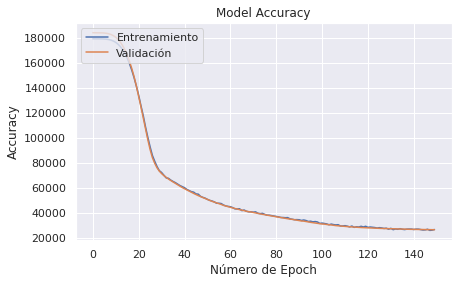

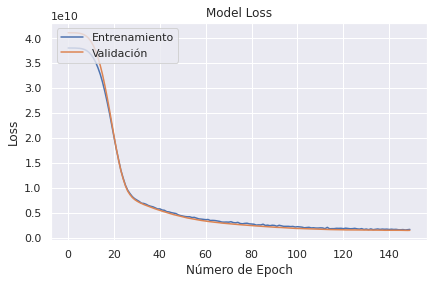

In [29]:
# Miramos el gráfico del accuracy para el conjunto de entrenamiento y prueba
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Número de Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Miramos el gráfico de pérdida para el conjunto de entrenamiento y prueba
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Número de Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

Recargamos los datos de test para predecir.

In [30]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

Escogemos como datos de entrada claramente las mismas columnas que para datos de entrenamiento. Y realizamos el mismo procedimiento de estandarización

In [31]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
id_col = df_test['Id'].values.tolist()
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())
X_test = df_test[cols].values

# Volvemos a usar la estandarización 
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

Una vez realizado el entrenamiento, le pasamos al modelo nuevos ejemplos que no ha visto para que realice una predicción.

In [32]:
prediction = model.predict(X_test)

Como queremos ver un ejemplode valor real, vamos a crear una variable X_new que nos sirva como nuevo ejemplo de un dato que el algoritmo nunca ha visto. Debemos preprocesar este nuevo ejemplo antes de predecirlo

In [33]:
X_new = X_test[30]
print(X_new)

scale = StandardScaler()
X_new = scale.fit_transform(X_test)

[0.64134693 0.50690378 0.30162251 0.77308345 1.07447637]


Realizamos la predicción

In [34]:
Y_predict = model.predict(X_new)

Comparamos la predicción con el valor original

In [35]:
print ( " Predicción realizada por el modelo", Y_predict[30].round(2))
print (" Valor original ", y_val[30])

 Predicción realizada por el modelo [220745.14]
 Valor original  162900


Creamos el fichero final para submission.csv

In [36]:
#submission = pd.DataFrame()
#submission['Id'] = id_col
#submission['SalePrice'] = prediction

In [37]:
#submission.to_csv('submission.csv', index=False)

Como creemos que podemos mejorar el modelo, vamos a intentar con **RandomForest** como algoritmo de predicción

Volvemos a cargar el fichero de datos de entrenamiento

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
file_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
home_data = pd.read_csv(file_path)

Escogemos como características de entrada algunas de las columnas del conjunto de datos. Claramente seleccionaremos las características más relevantes y que no tengan valores nulos

Añadimos las columnas a nuestro conjunto de datos de entrada X

In [39]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'MSSubClass',
            'OverallQual', 'OverallCond', 'YearRemodAdd', 'LowQualFinSF', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
            'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',    
            'MiscVal', 'MoSold', 'YrSold']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,MSSubClass,OverallQual,OverallCond,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,2003,856,854,2,3,8,60,7,5,...,0,0,61,0,0,0,0,0,2,2008
1,9600,1976,1262,0,2,3,6,20,6,8,...,1,298,0,0,0,0,0,0,5,2007
2,11250,2001,920,866,2,3,6,60,7,5,...,1,0,42,0,0,0,0,0,9,2008
3,9550,1915,961,756,1,3,7,70,7,5,...,1,0,35,272,0,0,0,0,2,2006
4,14260,2000,1145,1053,2,4,9,60,8,5,...,1,192,84,0,0,0,0,0,12,2008


y será la etiqueta de salida, "SalePrice"

In [40]:
y = home_data.SalePrice

Dividimos el conjunto de datos X en entrenamiento y validación con la función train_test_spit

In [41]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Creamos nuestro modelo Random Forest.

* random_state : semilla para que los resultados sean reproducibles.

In [42]:
rf_model = RandomForestRegressor(random_state=1)

Entrenamos el modelo y predecimos con el conjunto de datos de validación.
Comprobamos el valor absoluto medio.

In [43]:
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,747


Como vemos que el error no os demasiado grande, podemos mantener este modelo

In [44]:
rf_model_on_full_data = RandomForestRegressor()
rf_model_on_full_data.fit(X, y)

RandomForestRegressor()

Prededimos con valores nuevos que no conoce el modelo 

In [45]:
test_data_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
test_dataF = pd.read_csv(test_data_path)

test_X = test_dataF[features]
test_preds = rf_model_on_full_data.predict(test_X)

Guardamos en archivo de submission los resultados

In [46]:
output = pd.DataFrame({'Id': test_dataF.Id,
                       'SalePrice': test_preds})

output.to_csv('submission.csv', index=False)

Al principio hemos pensado que una red neuronal podía ser un buen modelo, pero acabamos de ver que el algoritmo RandomForest que es más sencillo funciona mejor para datos nuevos.

Seguramente nuestra red neuronal esté produciendo overfitting o incluso las características de entrada no sean las adecuadas para el proceso de entrenamiento.